In [3]:
import numpy as np
import scipy.io
#from scipy import io
import matplotlib.pyplot as plt
%matplotlib inline
import random
import math
import io
import pandas as pd
from scipy import optimize, special


In [90]:
vars = {}
a = scipy.io.loadmat("./ex5/ex5data1.mat",vars)
X_train = a['X']
X_test = a['Xtest']
X_val = a['Xval']
X_val_plot = X_val
y_val = a['yval']
Theta = np.ones((2,1))
Theta_poly = np.ones((9,1))
X_val = np.concatenate((np.ones((len(y_val),1)),X_val),axis=1)
y_train = a['y']
X_train_plot= X_train
y_test = a['ytest']
X_train = np.concatenate((np.ones((len(y_train),1)),X_train),axis=1)

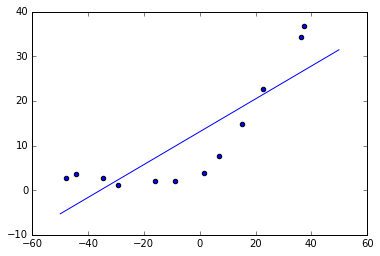

In [21]:
plt.scatter(X_train_plot,y_train)
plt.plot(real_plot_X,plot_Y)

In [160]:
def cost(theta,dataset,labels,regularizer=1000000000000000000000):
    if(len(theta.shape)==1):
        theta = theta[:,np.newaxis]
    m=len(labels)
    dummy_theta = np.copy(theta)
    np.put(dummy_theta,0,0)
    prediction = predict(dataset,theta)
    cost = 1 / (2*m) * np.sum((predict(dataset,theta)-labels)**2) + regularizer/(2*m)*np.sum(theta[1:]**2)
    return cost
def gradient(theta,dataset,labels,regularizer=1000000000000000000000):
    if(len(theta.shape)==1):
        theta = theta[:,np.newaxis]
    m=len(labels)
    dummy_theta = np.copy(theta)
    np.put(dummy_theta,0,0)
    prediction = predict(dataset,theta)
    grad = (1/m * np.dot((prediction-labels).T,dataset)) + regularizer/m * dummy_theta.T
    return grad.T.flatten()
def predict(dataset,theta):
    return np.dot(dataset,theta)

In [99]:
def minimize(theta,dataset,labels):
    return scipy.optimize.minimize(cost,theta,method='CG',jac=gradient, args=(dataset,labels),tol=0.00005)

In [14]:
results= minimize(Theta,X_train,y_train)
new_global_theta = results['x']
new_global_theta = new_global_theta[:,np.newaxis]

In [15]:

cost(Theta,X_train,y_train)


303.95152555359761

In [16]:
plot_X = np.arange(-50,50,0.1)
plot_X = plot_X[:,np.newaxis]
plot_X = np.concatenate((np.ones((1000,1)),plot_X),axis=1)
plot_Y = predict(plot_X,new_global_theta)
real_plot_X = np.arange(-50,50,0.1)

In [166]:
def plot_function_and_scatter(dataset,labels,features_nr,left,right):
    plot_X = np.arange(left,right,0.1)
    plot_X = plot_X[:,np.newaxis]
    plot_X = np.concatenate((np.ones(((np.abs(left)+np.abs(right))*10,1)),plot_X),axis=1)
    plot_X = poly_features(plot_X,features_nr-1)
    initial_theta = np.ones((features_nr,1))
    theta = minimize(initial_theta,poly_features(dataset,features_nr-1),labels)['x']
    plot_Y = predict(plot_X,theta)
    real_plot_X = np.arange(left,right,0.1)
    plt.scatter(dataset.T[1],labels)
    plt.plot(real_plot_X,plot_Y)
    

(2000, 30)


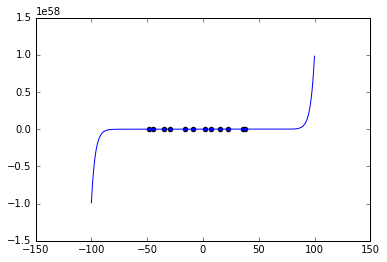

In [165]:
plot_function_and_scatter(X_train,y_train,30,-100,100)

In [110]:
def learning_curves(train_data,train_labels,val_data,val_labels,regularizer,features_nr):
    X_axis = np.arange(1,len(train_labels))
    X_axis = X_axis[:,np.newaxis]
    training_error = []
    validation_error = []
    initial_theta = np.ones((features_nr,1))
    for i in range(1,len(train_labels)):
        curr_theta = minimize(initial_theta,train_data[:i],train_labels[:i])['x']
        curr_theta = curr_theta[:,np.newaxis]
        training_error.append(cost(curr_theta,train_data[:i],train_labels[:i]))
        validation_error.append(cost(curr_theta,val_data,val_labels))
    plt.plot(X_axis,training_error)
    plt.plot(X_axis,validation_error)
        

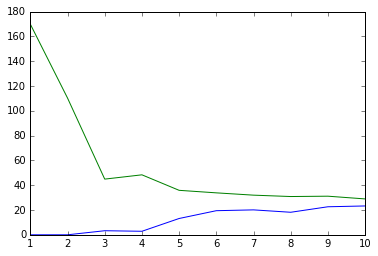

In [103]:
learning_curves(X_train,y_train,X_val,y_val,0,2)

In [49]:
def poly_features(input_data,polynomials):
    dataset = np.copy(input_data)
    if(len(dataset.shape) == 1):
        dataset = np.concatenate((np.ones((len(dataset),1)),dataset),axis=1)
    feature_column = dataset.T[1]
    feature_column = feature_column[:,np.newaxis]
    if(polynomials==1):
        return dataset
    for i in range(1,polynomials):
        dataset = np.append(dataset,np.power(feature_column,i+1),axis=1)
    return dataset
        
        

In [80]:
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    np.put(mu,0,0)
    dataset_norm = dataset - mu
    sigma = np.std(dataset_norm,axis=0)
    np.put(sigma,0,1)
    result = dataset_norm / sigma
    return result



In [104]:
X_train_polynomials = feature_normalize(poly_features(X_train,8))
X_val_polynomials = feature_normalize(poly_features(X_val,8))

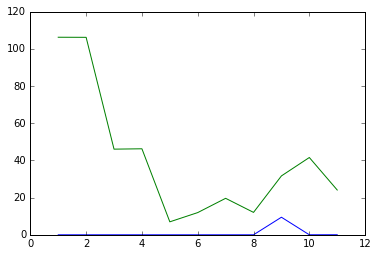

In [111]:
learning_curves(X_train_polynomials,y_train,X_val_polynomials,y_val,0,9)

In [87]:
X_train_polynomials.shape

(9,)